## LUCA AMBROSIO
### HOMEWORK 4


This homework is based on the wine quality classification research paper and
dataset shared on the course page.

## What to do

The homework consists in the following parts.
1. Build a classification model which is able to predict the quality of the wine
(multiclass classification) based on its physicochemical values. Use AdaBoost
and Gradient Boost applied to decision trees, and compare the results with
the ones obtained in HW3 (Decision Tree and Random Forest).
2. Build a classification model which is able to predict the quality of the wine
(binary classification) based on its physicochemical values. Use SVM, and 
compare the results with the ones obtained in HW2 - question 2 (Logistic
Regression).


## Approach

The idea is to apply different approaches and evaluate them, in terms of Accuracy,
Precision-per class and Recall-per class. Per each approach, plot also the Confusion
Matrix and make some reasoning over it. Make a conclusion, proposing your best
model.

## Suggestions

Perform model parameters tuning, when appropriate.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data1 = pd.read_csv("winequality-white.csv", error_bad_lines=False, sep = ';')
data2 = pd.read_csv("winequality-red.csv", error_bad_lines=False,  sep = ';')

during this homework it was decided to keep the two datasets separate, thus working in a cao with red wines and with the other dataset with white wines.


In [3]:
x = data1[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = data1["quality"]

xx = data2[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
yy = data2["quality"]

## AdaBoostClassifier

### Red Wine

In [4]:
# AdaBoostClassifier per i vini rossi

#I divide the data between test data and training data
[xTrain, xTest] = train_test_split(x, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset
[yTrain, yTest] = train_test_split(y, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15),n_estimators=30)
classifier.fit(xTrain, yTrain)
predictions = classifier.predict(xTest)
cm = confusion_matrix(yTest, predictions)
print(cm)

print("Train Accuracy: {}".format(metrics.accuracy_score(yTrain, classifier.predict(xTrain))))
print("Test Accuracy: {}".format(metrics.accuracy_score(yTest, predictions)))

labels_prob_predicted_red = classifier.predict_proba(xTest)
#accuracy
print("Red Wine quality preciction model Accuracy: {}".format(metrics.accuracy_score(yTest, predictions)))
#precision and recall per class
print(metrics.classification_report(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
print(cm)

[[  0   0   2   3   0   0]
 [  0   5   5  15   0   0]
 [  0   2 197  89   3   0]
 [  0   0  66 337  29   0]
 [  0   0   3  73 115   1]
 [  0   0   0  12   8  15]]
Train Accuracy: 1.0
Test Accuracy: 0.6826530612244898
Red Wine quality preciction model Accuracy: 0.6826530612244898
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.71      0.20      0.31        25
           5       0.72      0.68      0.70       291
           6       0.64      0.78      0.70       432
           7       0.74      0.60      0.66       192
           8       0.94      0.43      0.59        35

   micro avg       0.68      0.68      0.68       980
   macro avg       0.63      0.45      0.49       980
weighted avg       0.69      0.68      0.68       980

[[  0   0   2   3   0   0]
 [  0   5   5  15   0   0]
 [  0   2 197  89   3   0]
 [  0   0  66 337  29   0]
 [  0   0   3  73 115   1]
 [  0   0   0  12   8  15]]


C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### White Wine

In [5]:
# AdaBoostClassifier per i vini rossi

#I divide the data between test data and training data
[xTrain, xTest] = train_test_split(xx, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset
[yTrain, yTest] = train_test_split(yy, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15),n_estimators=30)
classifier.fit(xTrain, yTrain)
predictions = classifier.predict(xTest)
cm = confusion_matrix(yTest, predictions)
print(cm)

print("Train Accuracy: {}".format(metrics.accuracy_score(yTrain, classifier.predict(xTrain))))
print("Test Accuracy: {}".format(metrics.accuracy_score(yTest, predictions)))

labels_prob_predicted_red = classifier.predict_proba(xTest)
#accuracy
print("Red Wine quality preciction model Accuracy: {}".format(metrics.accuracy_score(yTest, predictions)))
#precision and recall per class
print(metrics.classification_report(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
print(cm)

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  1 97 32  0  0]
 [ 0  0 32 93  7  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  1  4  0]]
Train Accuracy: 1.0
Test Accuracy: 0.65625
Red Wine quality preciction model Accuracy: 0.65625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.70      0.66       132
           7       0.65      0.48      0.55        42
           8       0.00      0.00      0.00         5

   micro avg       0.66      0.66      0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  1 97 32  0  0]
 [ 0  0 32 93  7  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  1  4  0]]


C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Luca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Gradient Boost 

### Red Wine

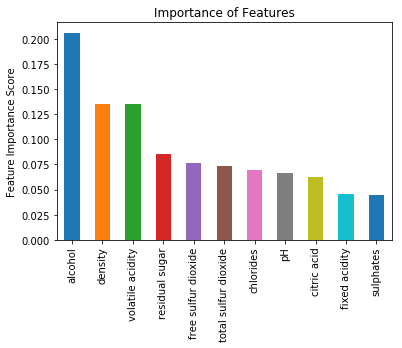

Accuracy of the GBM on test set: 0.570
              precision    recall  f1-score   support

           3       0.33      0.20      0.25         5
           4       0.55      0.24      0.33        25
           5       0.59      0.55      0.57       291
           6       0.55      0.72      0.63       432
           7       0.62      0.37      0.46       192
           8       0.62      0.23      0.33        35

   micro avg       0.57      0.57      0.57       980
   macro avg       0.54      0.39      0.43       980
weighted avg       0.58      0.57      0.56       980



In [6]:
[xTrain, xTest] = train_test_split(x, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset
[yTrain, yTest] = train_test_split(y, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(xTrain,yTrain)

predictors=list(xTrain) #features names

feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.show()
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(xTest, yTest)))

pred=baseline.predict(xTest)
print(classification_report(yTest, pred))


In [7]:
p_test = {'learning_rate':[0.1,0.01], 'n_estimators':[100,200,300]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                                            subsample=1,max_features='sqrt', random_state=10), 
                      param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(xTrain,yTrain)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 300}, 0.6444612030009481)

In [8]:
p_test2 = {'max_depth':[2,4,5] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=300, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(xTrain,yTrain)
tuning.best_params_, tuning.best_score_

({'max_depth': 5}, 0.6462436683933447)

### White Wine

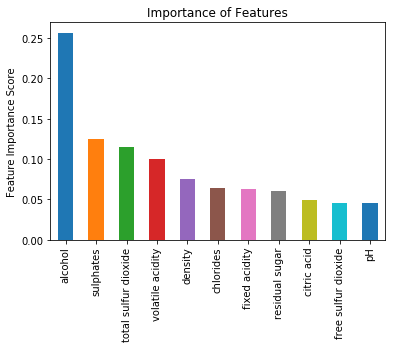

Accuracy of the GBM on test set: 0.622
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.70      0.74      0.72       130
           6       0.59      0.64      0.61       132
           7       0.52      0.40      0.45        42
           8       0.00      0.00      0.00         5

   micro avg       0.62      0.62      0.62       320
   macro avg       0.47      0.31      0.33       320
weighted avg       0.62      0.62      0.61       320



In [10]:
[xTrain, xTest] = train_test_split(xx, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset
[yTrain, yTest] = train_test_split(yy, test_size=0.2, random_state=42) # la dimensione del test set è il 20% del dataset


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(xTrain,yTrain)

predictors=list(xTrain) #features names

feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.show()
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(xTest, yTest)))

pred=baseline.predict(xTest)
print(classification_report(yTest, pred))

In [11]:
p_test = {'learning_rate':[0.1,0.01], 'n_estimators':[100,200,300]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                                            subsample=1,max_features='sqrt', random_state=10), 
                      param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(xTrain,yTrain)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 100}, 0.6687210368873554)

In [12]:
p_test2 = {'max_depth':[2,4,5] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=300, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(xTrain,yTrain)
tuning.best_params_, tuning.best_score_

({'max_depth': 5}, 0.6732956918278651)

## Conclusions

si può notare che pur mantendo i due dataset separati si avranno risultati simili a quelli ottenuti a dataset unificato.
Per quel che riguarda Gradient Boost si è deciso di ottimizzare i risultati ottenuti dal puro algoritmo andando a effettuare un tuning dei parametri.
Per effettuare questo tuning si è utilizzato GridSearchCV e ci permette di avere migliori risultati semplicemente tunando i parametri.
Per quello che riguarda i risultati di classificazione l'algoritmo che performa meglio sembra rimanere RandomForestClassifier.
